---
title: Experimental Analysis of Algorithms
date: 2020-06-01 10:18:36 +0800
modified: 2020-06-01 10:18:36 +0800
tags: [algorithm, python, optimization, algorithm analysis]
description: 
series: 
usemathjax: true
---

Analyzing algorithm running time is essential especially when optimizing production-ready code. One way of doing it, albeit very crude, is by using the Python time module. We can try executing the algorithm a number of times using a set of test inputs and recording the time spent during each execution. It will then report the number of seconds, or fractions of second, that have elapsed since we first executed our function.

It works something like this:

```python
start_time = time()
run algorithm
end_time = time()
elapsed_time = end_time - start_time
```

It starts by first recording the the time before the algorithm was run and calculating a diff immediately after it finished executing. Keep in mind however, that a measure like this is a decent reflection of an algorithm's efficiency but it is not perfect. This is due to the fact that most computer systems share resources with many other processes. For instance, processing power and memory allocation may differ from one run to another.

In [2]:
from time import time


def fn_elapsed_time(fn, n):
    '''
    Calculate the elapsed time in ms for a function, fn
    with arguments n
    '''
    start_time = time()
    fn(n)
    end_time = time()
    elapsed_time = (end_time - start_time) * 1000
    return n, elapsed_time

## Factorial

Because we are generally interested in the running time dependence to input size, we can perform independent experiments on many different test inputs of various sizes.

Let's take for instance the recursive factorial function with base cases defined as follows:



$$
\text{fac}(n) = \begin{cases}
1, &n = 1 \\
n + \text{fac}(n-1), &n > 1
\end{cases}
$$



and in actual python code:

In [3]:
def fac(n):
    '''
    Calculate the factorial of a number, n
    '''
    return 1 if n == 1 else n * fac(n-1)

Implementing our experiment for analysis would look something like this

In [5]:
results = []

for i in range(1, 10):
    results.append(fn_elapsed_time(fac, i * 10))

In [6]:
import pandas as pd


df = pd.DataFrame(results, columns=['n', 't'])

,n,t
0,10,0.007868
1,20,0.011921
2,30,0.017643
3,40,0.040531
4,50,0.032902
5,60,0.036240
6,70,0.044823
7,80,0.048161
8,90,0.055075


We can then visualize the results by plotting the performance of each run as a point (n, t). This will provide us with some insight on the efficiency of the algorithm with respect to its input growth.

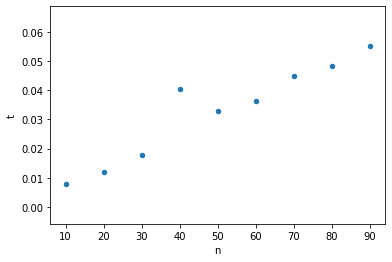

In [7]:
df.plot.scatter(x='n', y='t')

## Limitations

As discussed earlier, there are a lot of challenges with the reliability of this approach:

- experiments must be done on the same hardware and software environments for us to create meaningful comparison
- experiments can be done only on limited set of test inputs which means there are a lot of excluded inputs and some of these may be important
- the algorithm must be fully implemented for us to run it